# Análise de Cancelamentos de Clientes (Churn Analysis)

Projeto de Data Analytics com ênfaze em pensamento analítico, exploração de dados e comunicação de insights voltado para identificar os principais drivers de churn e gerar insights acionáveis para Retenção, Customer Success, CRM e Estratégia Comercial.

A análise combina exploração de dados (EDA), métricas estatísticas e testes de associação para quantificar o impacto de fatores operacionais e comportamentais sobre a taxa de cancelamento, apoiando decisões práticas para redução de churn e aumento do valor do cliente.

# 1. Ambiente e Dependências

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 2 . Carregamento da Base de Dados e Diagnótico Inicial

In [9]:
df = pd.read_csv("cancelamentos.csv")
display(df)

CustomerID  idade    sexo  tempo_como_cliente  frequencia_uso  \
0        349936.0   23.0    Male                13.0            22.0   
1        100634.0   49.0    Male                55.0            16.0   
2        301263.0   30.0    Male                 7.0             1.0   
3        119358.0   26.0    Male                40.0             5.0   
4        130955.0   27.0  Female                17.0            30.0   
...           ...    ...     ...                 ...             ...   
49995    195680.0   62.0  Female                35.0             7.0   
49996     43477.0   36.0    Male                43.0            21.0   
49997    169273.0   55.0    Male                42.0             8.0   
49998    310693.0   40.0  Female                14.0            19.0   
49999    251915.0   64.0    Male                41.0            29.0   

       ligacoes_callcenter  dias_atraso assinatura duracao_contrato  \
0                      2.0          1.0   Standard           Annual   
1                      3.0          6.0    Premium          Monthly   
2                      0.0          8.0      Basic           Annual   
3                      3.0          8.0    Premium           Annual   
4                      5.0          6.0      Basic           Annual   
...                    ...          ...        ...              ...   
49995                  2.0          8.0      Basic           Annual   
49996                  2.0         30.0      Basic        Quarterly   
49997                  1.0         12.0      Basic          Monthly   
49998                  1.0         17.0    Premium        Quarterly   
49999                  5.0          9.0      Basic        Quarterly   

       total_gasto  meses_ultima_interacao  cancelou  
0           909.58                    23.0       0.0  
1           207.00                    29.0       1.0  
2           768.78                     7.0       0.0  
3           398.00                    12.0       1.0  
4           507.00                    15.0       1.0  
...            ...                     ...       ...  
49995       232.00                    15.0       1.0  
49996       928.00                    30.0       1.0  
49997       326.00                    27.0       1.0  
49998       826.76                    12.0       0.0  
49999       700.38                    18.0       1.0  

[50000 rows x 12 columns]

In [10]:
# Verificando o formato dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              50000 non-null  float64
 1   idade                   50000 non-null  float64
 2   sexo                    49997 non-null  object 
 3   tempo_como_cliente      49998 non-null  float64
 4   frequencia_uso          50000 non-null  float64
 5   ligacoes_callcenter     50000 non-null  float64
 6   dias_atraso             50000 non-null  float64
 7   assinatura              50000 non-null  object 
 8   duracao_contrato        50000 non-null  object 
 9   total_gasto             50000 non-null  float64
 10  meses_ultima_interacao  50000 non-null  float64
 11  cancelou                50000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 4.6+ MB


In [11]:
df.describe(include='all').T

count unique       top   freq          mean  \
CustomerID              50000.0    NaN       NaN    NaN  226149.81468   
idade                   50000.0    NaN       NaN    NaN      39.32598   
sexo                      49997      2      Male  28261           NaN   
tempo_como_cliente      49998.0    NaN       NaN    NaN     31.312492   
frequencia_uso          50000.0    NaN       NaN    NaN       15.8172   
ligacoes_callcenter     50000.0    NaN       NaN    NaN       3.59436   
dias_atraso             50000.0    NaN       NaN    NaN      13.01502   
assinatura                50000      3  Standard  17066           NaN   
duracao_contrato          50000      3    Annual  20157           NaN   
total_gasto             50000.0    NaN       NaN    NaN    631.757612   
meses_ultima_interacao  50000.0    NaN       NaN    NaN      14.51426   
cancelou                50000.0    NaN       NaN    NaN       0.56788   

                                  std    min        25%       50%       75%  \
CustomerID              129140.879889    9.0  114256.25  227891.0  337535.0   
idade                       12.405312   18.0       29.0      39.0      48.0   
sexo                              NaN    NaN        NaN       NaN       NaN   
tempo_como_cliente          17.231867    1.0       16.0      32.0      46.0   
frequencia_uso               8.564313    1.0        9.0      16.0      23.0   
ligacoes_callcenter          3.062353    0.0        1.0       3.0       6.0   
dias_atraso                    8.2573    0.0        6.0      13.0      19.0   
assinatura                        NaN    NaN        NaN       NaN       NaN   
duracao_contrato                  NaN    NaN        NaN       NaN       NaN   
total_gasto                241.131386  100.0      481.0     661.0  830.6125   
meses_ultima_interacao       8.605975    1.0        7.0      14.0      22.0   
cancelou                     0.495376    0.0        0.0       1.0       1.0   

                             max  
CustomerID              449997.0  
idade                       65.0  
sexo                         NaN  
tempo_como_cliente          60.0  
frequencia_uso              30.0  
ligacoes_callcenter         10.0  
dias_atraso                 30.0  
assinatura                   NaN  
duracao_contrato             NaN  
total_gasto               1000.0  
meses_ultima_interacao      30.0  
cancelou                     1.0

# 3. Limpeza e Tratamento de Dados (ETL)

In [12]:
# Convertendo tipos de dados
dtypes = {
    "CustomerID": "int64",
    "idade": "int64",
    "ligacoes_callcenter": "int64",
    "sexo": "category",
    "assinatura": "category",
    "duracao_contrato": "category",
    "cancelou": "int64"
}
df = df.astype(dtypes)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              50000 non-null  int64   
 1   idade                   50000 non-null  int64   
 2   sexo                    49997 non-null  category
 3   tempo_como_cliente      49998 non-null  float64 
 4   frequencia_uso          50000 non-null  float64 
 5   ligacoes_callcenter     50000 non-null  int64   
 6   dias_atraso             50000 non-null  float64 
 7   assinatura              50000 non-null  category
 8   duracao_contrato        50000 non-null  category
 9   total_gasto             50000 non-null  float64 
 10  meses_ultima_interacao  50000 non-null  float64 
 11  cancelou                50000 non-null  int64   
dtypes: category(3), float64(5), int64(4)
memory usage: 3.6 MB


In [13]:
# Verificando dados nulos e seu percentual
df.stb.missing()

missing  total  percent
sexo                          3  50000    0.006
tempo_como_cliente            2  50000    0.004
idade                         0  50000    0.000
CustomerID                    0  50000    0.000
frequencia_uso                0  50000    0.000
ligacoes_callcenter           0  50000    0.000
dias_atraso                   0  50000    0.000
assinatura                    0  50000    0.000
duracao_contrato              0  50000    0.000
total_gasto                   0  50000    0.000
meses_ultima_interacao        0  50000    0.000
cancelou                      0  50000    0.000

In [14]:
# Removendo linhas com dados nulos 
df = df.dropna().copy()
# Conferindo novamente dados nulos
df.stb.missing()

missing  total  percent
CustomerID                    0  49996      0.0
idade                         0  49996      0.0
sexo                          0  49996      0.0
tempo_como_cliente            0  49996      0.0
frequencia_uso                0  49996      0.0
ligacoes_callcenter           0  49996      0.0
dias_atraso                   0  49996      0.0
assinatura                    0  49996      0.0
duracao_contrato              0  49996      0.0
total_gasto                   0  49996      0.0
meses_ultima_interacao        0  49996      0.0
cancelou                      0  49996      0.0

In [15]:
# Verificando dados duplicados
df.duplicated().sum()

np.int64(1469)

In [16]:
df[df.duplicated(subset=["CustomerID"], keep=False)].sort_values("CustomerID")

CustomerID  idade    sexo  tempo_como_cliente  frequencia_uso  \
15824         243     34  Female                20.0            29.0   
15580         243     34  Female                20.0            29.0   
6295          259     62  Female                25.0            20.0   
42467         259     62  Female                25.0            20.0   
38226         360     18    Male                56.0             9.0   
...           ...    ...     ...                 ...             ...   
18632      445455     46    Male                45.0            27.0   
15795      445610     30    Male                32.0             9.0   
32667      445610     30    Male                32.0             9.0   
4887       446007     44  Female                38.0            27.0   
20975      446007     44  Female                38.0            27.0   

       ligacoes_callcenter  dias_atraso assinatura duracao_contrato  \
15824                    0          4.0      Basic           Annual   
15580                    0          4.0      Basic           Annual   
6295                    10         23.0      Basic           Annual   
42467                   10         23.0      Basic           Annual   
38226                    5         23.0      Basic          Monthly   
...                    ...          ...        ...              ...   
18632                    1         12.0      Basic        Quarterly   
15795                    3         18.0      Basic           Annual   
32667                    3         18.0      Basic           Annual   
4887                     2         13.0    Premium        Quarterly   
20975                    2         13.0    Premium        Quarterly   

       total_gasto  meses_ultima_interacao  cancelou  
15824       580.00                     4.0         0  
15580       580.00                     4.0         0  
6295        784.00                    23.0         1  
42467       784.00                    23.0         1  
38226       265.00                    24.0         1  
...            ...                     ...       ...  
18632       775.21                    22.0         0  
15795       832.65                    28.0         0  
32667       832.65                    28.0         0  
4887        586.10                     9.0         0  
20975       586.10                     9.0         0  

[2938 rows x 12 columns]

In [17]:
df = df.drop_duplicates().copy()
df.duplicated().sum()

np.int64(0)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48527 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              48527 non-null  int64   
 1   idade                   48527 non-null  int64   
 2   sexo                    48527 non-null  category
 3   tempo_como_cliente      48527 non-null  float64 
 4   frequencia_uso          48527 non-null  float64 
 5   ligacoes_callcenter     48527 non-null  int64   
 6   dias_atraso             48527 non-null  float64 
 7   assinatura              48527 non-null  category
 8   duracao_contrato        48527 non-null  category
 9   total_gasto             48527 non-null  float64 
 10  meses_ultima_interacao  48527 non-null  float64 
 11  cancelou                48527 non-null  int64   
dtypes: category(3), float64(5), int64(4)
memory usage: 3.8 MB


# 4. Análise Exploratória (EDA)

In [19]:
# Estatística sumária
df.describe(include='all').T

count unique       top   freq          mean  \
CustomerID              48527.0    NaN       NaN    NaN  226267.45282   
idade                   48527.0    NaN       NaN    NaN     39.323923   
sexo                      48527      2      Male  27435           NaN   
tempo_como_cliente      48527.0    NaN       NaN    NaN     31.302924   
frequencia_uso          48527.0    NaN       NaN    NaN     15.823356   
ligacoes_callcenter     48527.0    NaN       NaN    NaN      3.590517   
dias_atraso             48527.0    NaN       NaN    NaN     13.013704   
assinatura                48527      3  Standard  16566           NaN   
duracao_contrato          48527      3    Annual  19544           NaN   
total_gasto             48527.0    NaN       NaN    NaN     632.01113   
meses_ultima_interacao  48527.0    NaN       NaN    NaN     14.510911   
cancelou                48527.0    NaN       NaN    NaN      0.567499   

                                  std    min       25%       50%       75%  \
CustomerID              129154.440097    9.0  114376.0  227934.0  337704.0   
idade                       12.406114   18.0      29.0      39.0      48.0   
sexo                              NaN    NaN       NaN       NaN       NaN   
tempo_como_cliente          17.237564    1.0      16.0      32.0      46.0   
frequencia_uso                8.56283    1.0       9.0      16.0      23.0   
ligacoes_callcenter          3.061434    0.0       1.0       3.0       6.0   
dias_atraso                  8.256915    0.0       6.0      13.0      19.0   
assinatura                        NaN    NaN       NaN       NaN       NaN   
duracao_contrato                  NaN    NaN       NaN       NaN       NaN   
total_gasto                241.054516  100.0    481.46    661.17     831.0   
meses_ultima_interacao       8.604742    1.0       7.0      14.0      22.0   
cancelou                     0.495428    0.0       0.0       1.0       1.0   

                             max  
CustomerID              449997.0  
idade                       65.0  
sexo                         NaN  
tempo_como_cliente          60.0  
frequencia_uso              30.0  
ligacoes_callcenter         10.0  
dias_atraso                 30.0  
assinatura                   NaN  
duracao_contrato             NaN  
total_gasto               1000.0  
meses_ultima_interacao      30.0  
cancelou                     1.0

In [20]:
# Verificando o número de cancelamentos na base (valores absolutos e percentuais)
display(df["cancelou"].value_counts())

display(df["cancelou"].value_counts(normalize=True))

cancelou
1    27539
0    20988
Name: count, dtype: int64

cancelou
1    0.567499
0    0.432501
Name: proportion, dtype: float64

In [21]:
# Analisando visualmente as causas dos cancelamentos
df = df.drop(columns="CustomerID")

for coluna in df.columns:
    grafico = px.histogram(df, x=coluna, color="cancelou")
    grafico.show()

1. Clientes do contrato mensal TODOS cancelam
2. Clientes que ligam mais do que 4 vezes para o call center, cancelam
3. Clientes que atrasaram mais de 20 dias, cancelaram

# 5 . Associações estatísticas

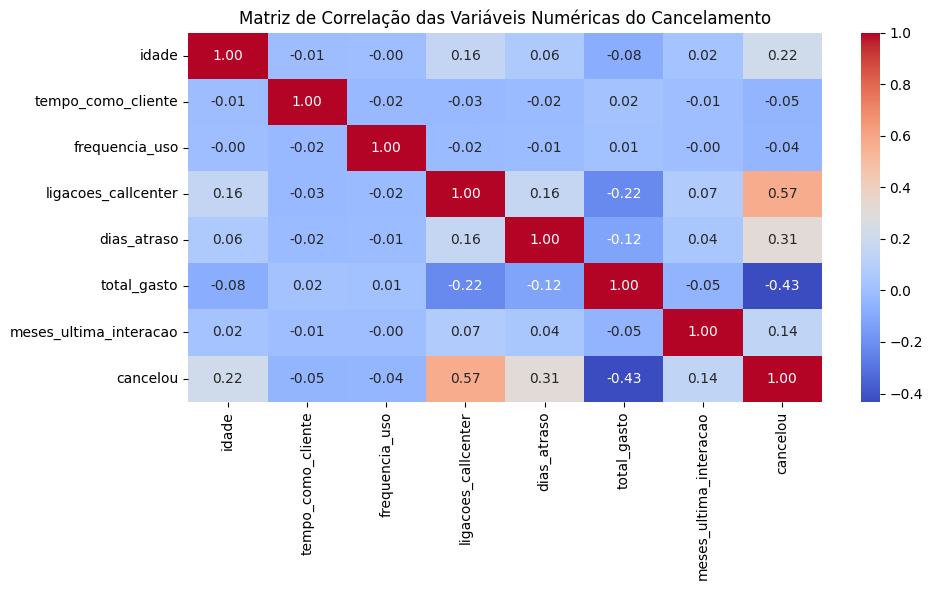

In [14]:
# Correlações entre as variáveis numéricas
num_cols = df.select_dtypes(include="number").columns
corr = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
     annot=True,
     fmt=".2f",
     cmap="coolwarm"
)
plt.title("Matriz de Correlação das Variáveis Numéricas do Cancelamento")
plt.tight_layout()
plt.show()

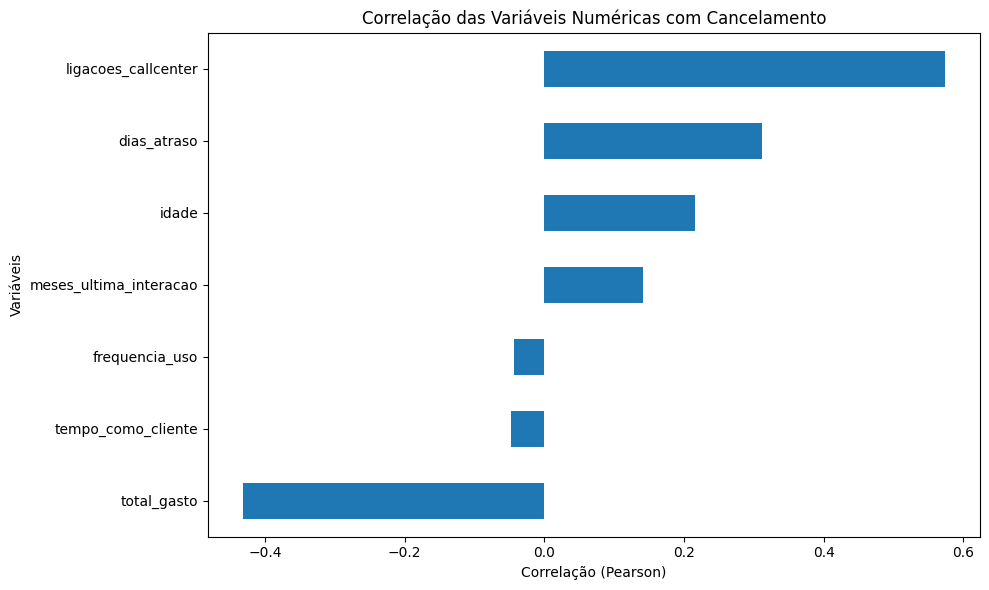

In [15]:
# Visualização hierárquica das correlações entre as variáveis numéricas e o cancelamento
num_cols = df.select_dtypes(include="number").columns

corr_cancelou = (
    df[num_cols]
    .corr()["cancelou"]
    .drop("cancelou")
    .sort_values()
)

plt.figure(figsize=(10, 6))
corr_cancelou.plot(kind="barh")
plt.title("Correlação das Variáveis Numéricas com Cancelamento")
plt.xlabel("Correlação (Pearson)")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

Os principais drivers numéricos associados ao cancelamento são o número de ligações ao callcenter e os dias de atraso, enquanto o total gasto apresenta associação inversa, sugerindo que clientes mais engajados e com maior valor tendem a cancelar menos.

In [16]:
# Correlações entre as variáveis categóricas e o cancelamento (Teste Qui-Quadrado)

cat_cols = df.select_dtypes(include=["object", "category"]).columns

resultados = []

for col in cat_cols:
    tabela = pd.crosstab(df[col], df["cancelou"])

    chi2, p, dof, expected = chi2_contingency(tabela)

    resultados.append({
        "variavel": col,
        "chi2": chi2,
        "p_value": p,
        "GL": dof,
        "n_categorias": tabela.shape[0],
        "significativo_5%": "Sim" if p < 0.05 else "Não"
    })

df_chi2 = pd.DataFrame(resultados).sort_values("p_value").reset_index(drop=True)

df_chi2

variavel         chi2   p_value  GL  n_categorias significativo_5%
0              sexo  1614.567276  0.000000   1             2              Sim
1  duracao_contrato  9116.061629  0.000000   2             3              Sim
2        assinatura    24.288210  0.000005   2             3              Sim

In [ ]:
# Definindo a função (Cramér’s V + p-value) para medir a força da associação entre variáveis categóricas e o cancelamento 

def cramers_v(x, y):
    tabel_c = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(tabel_c)
    n = tabel_c.sum().sum()
    r, k = tabel_c.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
    return v, p

In [ ]:
# Rankeando as variáveis categóricas mais associadas ao cancelamento (Cramér’s V + significância estatística) 

cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols = [col for col in cat_cols if col != "cancelou"]

resultados_cramer = []

for col in cat_cols:
    v, p = cramers_v(df[col], df["cancelou"])
    resultados_cramer.append({
        "variavel": col,
        "cramers_v": v,
        "p_value": p
    })
df_cramer = pd.DataFrame(resultados_cramer).sort_values("cramers_v", ascending=False)

def interpretacao_cramer(v):
    if v < 0.10:
        return "Muito fraca"
    elif v < 0.20:
        return "Fraca"
    elif v < 0.40:
        return "Moderada"
    elif v < 0.60:
        return "Forte"
    else:
        return "Muito forte"
df_cramer["Associação"] = df_cramer["cramers_v"].apply(interpretacao_cramer)

display(df_cramer)

variavel  cramers_v   p_value   Associação
2  duracao_contrato   0.433380  0.000000        Forte
0              sexo   0.182350  0.000000        Fraca
1        assinatura   0.021431  0.000005  Muito fraca

A duração do contrato apresenta impacto relevante e direto no cancelamento, reforçando que o cancelamento é explicado principalmente por fatores de produto/contrato, e não por perfil demográfico

# 6. Simulando o Cancelamento se os Principais Drivers Fossem Mitigados

In [23]:
# Aplicando filtros para resolver os drivers de cancelamento e analisar a evolução da taxa de cancelamento
df_1 = df.copy()
df_2 = df_1[df_1["duracao_contrato"] != "Monthly"]
df_3 = df_2[df_2["ligacoes_callcenter"] <= 4]
df_4 = df_3[df_3["dias_atraso"] <= 20]

resumo = pd.DataFrame({
    "etapa": [
        "Base original",
        "Resolvendo contratos Monthly",
        "Resolvendo Callcenter ≤ 4",
        " Resolvendo Dias Atraso ≤ 20"
    ],
    "taxa_cancelamento_%": [
        df_1["cancelou"].mean() * 100,
        df_2["cancelou"].mean() * 100,
        df_3["cancelou"].mean() * 100,
        df_4["cancelou"].mean() * 100
    ],
    "n_linhas": [
        len(df_1),
        len(df_2),
        len(df_3),
        len(df_4)
    ]
})
display(resumo)


etapa  taxa_cancelamento_%  n_linhas
0                 Base original            56.749851     48527
1  Resolvendo contratos Monthly            46.090620     38932
2     Resolvendo Callcenter ≤ 4            26.394630     28305
3   Resolvendo Dias Atraso ≤ 20            18.422804     25539

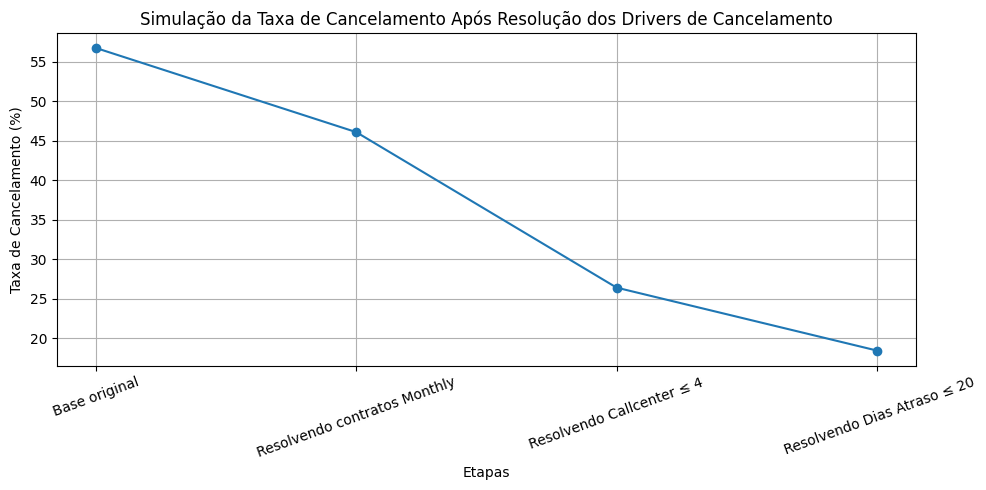

In [24]:
# Plotando a evolução da taxa de cancelamento
plt.figure(figsize=(10, 5))

plt.plot(
    resumo["etapa"],
    resumo["taxa_cancelamento_%"],
    marker="o"
)

plt.title("Simulação da Taxa de Cancelamento Após Resolução dos Drivers de Cancelamento")
plt.xlabel("Etapas")
plt.ylabel("Taxa de Cancelamento (%)")
plt.xticks(rotation=20)
plt.grid(True)
plt.tight_layout()
plt.show()


## Insights finais:
**Principais drivers de cancelamento:**

- Política de contratos: incentivar a migração de contratos Monthly para planos mais longos pode reduzir o churn em ~10%, aumentando previsibilidade de receita e retenção.

- Eficiência no atendimento: reduzir o volume de ligações e aumentar a resolução no primeiro contato no Call Center pode reduzir o churn em ~20%, diminuindo atrito e melhorando a experiência do cliente.

- Prevenção à inadimplência: implementar ações de cobrança preventiva e facilitação de pagamento para clientes com >20 dias de atraso pode reduzir o churn em ~8%, evitando cancelamentos por dificuldade financeira.

**Potencial estimado de impacto (simulação):** ao mitigar os três principais drivers identificados, a taxa de churn pode ser reduzida de 56% para 18%, evidenciando alto potencial de ganho operacional e retenção